In [72]:
import pandas as pd
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from modules.cleaners import clean_text
import string
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None


In [49]:
data_only_speech = pd.read_pickle('clean_speech.pkl')

df_after_first_clean = pd.read_pickle('speech_data_raw.pkl')

df_after_first_clean.drop(['speech'], axis=1)

df_after_first_clean['speech'] = data_only_speech.speech




#saving the new dataframe with the cleaned speaches and the presidents. 

df_after_first_clean.to_pickle('tokenized_dataframe.pkl')
df_after_first_clean


,year,President,Party,speech
0,1900,William McKinley,Republican,"[senate, house, representatives, outgoing, old..."
1,1901,Theodore Roosevelt,Republican,"[senate, house, representatives, congress, ass..."
2,1902,Theodore Roosevelt,Republican,"[senate, house, representatives, still, contin..."
3,1903,Theodore Roosevelt,Republican,"[senate, house, representatives, country, cong..."
4,1904,Theodore Roosevelt,Republican,"[senate, house, representatives, nation, conti..."
...,...,...,...,...
116,2017,Donald Trump,Republican,"[mr, speaker, mr, vice, president, members, co..."
117,2018,Donald Trump,Republican,"[mr, speaker, mr, vice, president, members, co..."
118,2019,Donald Trump,Republican,"[madam, speaker, mr, vice, president, members,..."
119,2020,Donald Trump,Republican,"[madam, speaker, mr, vice, president, members,..."


In [26]:
pickle_test = pd.read_pickle('speech_data_raw.pkl')

pickle_test.head()

,year,President,Party,speech
0,1900,William McKinley,Republican,To the Senate and House of Representatives: \n...
1,1901,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...
2,1902,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...
3,1903,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...
4,1904,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

df3 = df_after_first_clean['speech'].astype(str)


#Creating Document term matrix
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.speech.astype(str))
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df.year





In [21]:

#saving the document term matrix to use it in the sentiment file
data_dtm.to_pickle("doc_term_matrix.pkl")

In [32]:
#Loading the Document term matrix 
data = pd.read_pickle('doc_term_matrix.pkl')
data = data.transpose()
data.head()

year,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,1,1,2,1,0,1,0,3,0,...,0,0,0,1,0,0,0,0,1,0
abandoned,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Top words by year. More fun if it could be by president. 

top_words = {}
for w in data.columns:
    top = data[w].sort_values(ascending=False).head(30)
    top_words[w]= list(zip(top.index, top.values))

top_words



{1900: [('government', 66),
  ('states', 58),
  ('congress', 48),
  ('united', 45),
  ('year', 45),
  ('american', 33),
  ('foreign', 31),
  ('chinese', 28),
  ('trade', 23),
  ('convention', 22),
  ('new', 21),
  ('great', 21),
  ('number', 21),
  ('powers', 21),
  ('general', 20),
  ('international', 20),
  ('increase', 20),
  ('treaty', 19),
  ('time', 19),
  ('national', 19),
  ('work', 19),
  ('secretary', 19),
  ('action', 19),
  ('china', 18),
  ('legations', 18),
  ('imperial', 17),
  ('country', 17),
  ('act', 17),
  ('law', 16),
  ('service', 16)],
 1901: [('great', 60),
  ('government', 51),
  ('men', 51),
  ('people', 47),
  ('states', 44),
  ('american', 42),
  ('work', 40),
  ('law', 40),
  ('business', 38),
  ('nation', 38),
  ('man', 36),
  ('public', 36),
  ('national', 34),
  ('war', 34),
  ('conditions', 32),
  ('congress', 32),
  ('country', 32),
  ('united', 31),
  ('power', 31),
  ('service', 30),
  ('necessary', 29),
  ('good', 29),
  ('world', 29),
  ('navy', 29

In [99]:
top2 = top_words[2019]
top2 

[('american', 29),
 ('america', 24),
 ('new', 23),
 ('united', 21),
 ('years', 21),
 ('states', 20),
 ('tonight', 18),
 ('americans', 17),
 ('country', 17),
 ('congress', 14),
 ('border', 13),
 ('nation', 13),
 ('women', 12),
 ('decades', 12),
 ('year', 11),
 ('come', 11),
 ('time', 11),
 ('world', 10),
 ('work', 10),
 ('administration', 10),
 ('people', 10),
 ('illegal', 10),
 ('jobs', 9),
 ('make', 8),
 ('ago', 8),
 ('fight', 7),
 ('know', 7),
 ('alice', 7),
 ('legislation', 7),
 ('trade', 7)]

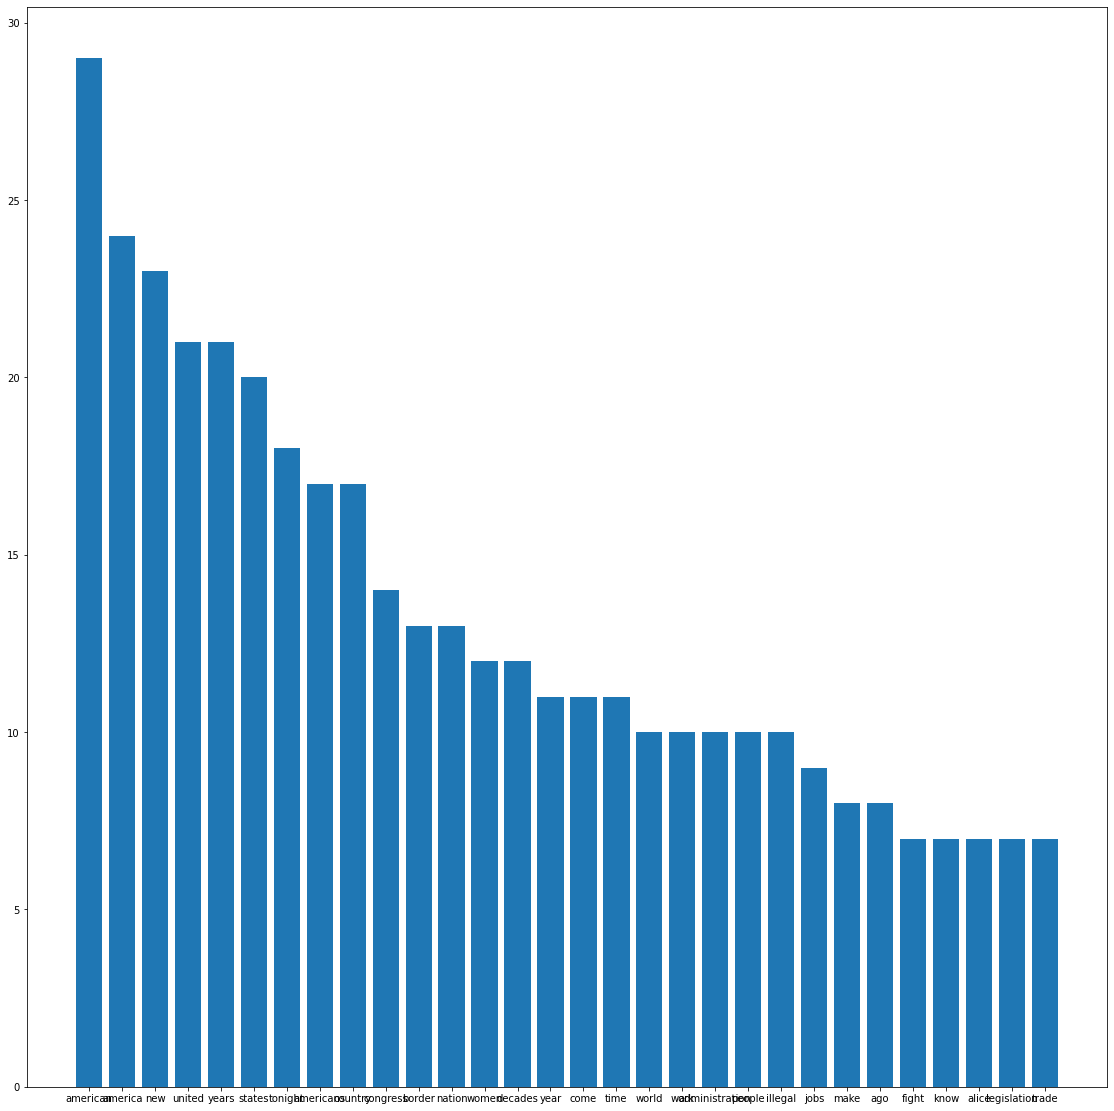

In [111]:
words = pd.Series(dict(top2))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = words.index
y = words.values

ax.bar(x,y)
plt.show()


In [114]:
"""for i in range(1900,2021):
    words = pd.Series(dict(top_words[i]))

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = words.index
    y = words.values
    ax.bar(x,y)
    plt.show() """

'for i in range(1900,2021):\n    words = pd.Series(dict(top_words[i]))\n\n    fig = plt.figure()\n    ax = fig.add_axes([0,0,1,1])\n    x = words.index\n    y = words.values\n    ax.bar(x,y)\n    plt.show() '